## Different architechtures of CNN on Fashion MNIST
Here we will be using fashion mnist data beacuse MNIST digit recogntion gives very high accuracies on CNN so we wont be able to really comapre the different architectures as they will have very little difference.

### Reading Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import keras 
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [0]:
y_train = keras.utils.to_categorical(y_train,  num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            pass
            #ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


In [0]:
imgs = [ x_test[y_test==label][:5] for label in np.unique(y_test) ]

We have 10 classes of different cloths plotting row-wise.

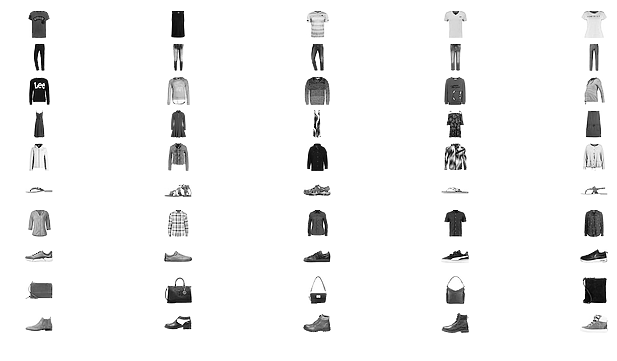

In [38]:
plots(np.reshape(imgs, (50,28,28)),rows=10)

In [0]:
def preprocessing_image(imgs):
  return imgs/255.0

In [0]:
import keras
import tensorflow as tf
tf.set_random_seed(94)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D

In [0]:
input_shape=(28,28,1)
num_classes = 10
batch_size=128

In [0]:
def create_model(kernel_size=(3,3), pool_size=(2,2),pooling=True):
  model = Sequential()
  
  #model.add(InputLayer(input_shape=input_shape))
  model.add(Conv2D(128, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
  if(pooling):
    model.add(MaxPooling2D(pool_size=pool_size)) 
  model.add(Conv2D(56, kernel_size=kernel_size, activation='relu'))
  if(pooling):
    model.add(MaxPooling2D(pool_size=pool_size))  
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  
  return model

In [0]:
model1 = create_model(kernel_size=(8,8))

In [111]:
model1.summary()
##dont forget to use flatten before using dense after conv2d.
##dont forget to use to_categorical on multi label claasification using softmax
##if using 1st layer as Conv2D then input shape is (rows,cols,channles)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 56)          64568     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 56)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 56)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                570       
Total params: 66,418
Trainable params: 66,418
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
x_train_preprocessed = x_train/255.0
x_test_preprocessed = x_test/255.0

In [121]:
model1.fit(x_train_preprocessed, y_train, validation_split=0.1, batch_size=batch_size, 
           epochs=10, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 8s - loss: 0.6217 - acc: 0.7745 - val_loss: 0.4183 - val_acc: 0.8463
Epoch 2/10
 - 7s - loss: 0.3926 - acc: 0.8569 - val_loss: 0.4072 - val_acc: 0.8507
Epoch 3/10
 - 7s - loss: 0.3411 - acc: 0.8760 - val_loss: 0.3385 - val_acc: 0.8767
Epoch 4/10
 - 7s - loss: 0.3089 - acc: 0.8867 - val_loss: 0.3519 - val_acc: 0.8708
Epoch 5/10
 - 7s - loss: 0.2857 - acc: 0.8941 - val_loss: 0.3396 - val_acc: 0.8813
Epoch 6/10
 - 7s - loss: 0.2660 - acc: 0.9012 - val_loss: 0.2972 - val_acc: 0.8930
Epoch 7/10
 - 7s - loss: 0.2481 - acc: 0.9085 - val_loss: 0.2831 - val_acc: 0.8995
Epoch 8/10
 - 7s - loss: 0.2333 - acc: 0.9138 - val_loss: 0.2916 - val_acc: 0.8962
Epoch 9/10
 - 7s - loss: 0.2180 - acc: 0.9198 - val_loss: 0.2725 - val_acc: 0.9032
Epoch 10/10
 - 7s - loss: 0.2044 - acc: 0.9248 - val_loss: 0.2847 - val_acc: 0.9002


In [108]:
model1.evaluate(x_test_preprocessed, y_test) 
#pool_size=(2,2), kernel_size=(3,3)

10000/10000 [==============================] - 1s 120us/step


[0.2762002569913864, 0.8994]

#### Changing kernel size

Training accuracy increase with kernel size

Increase in test acuuracy by changing kernel size from (3,3) to (5,5), but when increased too much to (8,8) test accuracy decreases.

In [118]:
model1.evaluate(x_test_preprocessed, y_test) ## kernel size=(5,5)

10000/10000 [==============================] - 1s 116us/step


[0.2872223501086235, 0.9017]

In [123]:
model1.evaluate(x_test_preprocessed, y_test) ## kernel size=(8,8)

10000/10000 [==============================] - 1s 115us/step


[0.3009698882699013, 0.8925]

#### Changing Pool Size

Better Accuracy for small Pool Size

In [114]:
model1.evaluate(x_test_preprocessed, y_test) ## pool size=(4,4)

10000/10000 [==============================] - 1s 109us/step


[0.33245270640850066, 0.8844]

#### Effect of Pooling

Without Pooling better accuracy, could be because of better parameter initialization or maybe lateral translation is not important in this task or maybe downsampling is reducing features as input image size is small i.e. (28,28)

In [104]:
model1.evaluate(x_test_preprocessed, y_test) ##without pooling

10000/10000 [==============================] - 1s 139us/step


[0.2870144347131252, 0.9097]

#### Normalizing data

Little improvement when data was normalized

In [98]:
model1.evaluate(x_test_preprocessed, y_test) ##with normalizing

10000/10000 [==============================] - 1s 117us/step


[0.27834316152334215, 0.8996]

In [93]:
model1.evaluate(x_test, y_test) ##without normalizing

10000/10000 [==============================] - 1s 118us/step


[0.33223631479740146, 0.8882]